In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
pd.read_csv('diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
Diabetes=pd.read_csv('diabetes.csv')

In [5]:
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#Eliminate possible outliers
lowerLimit = Diabetes['Pregnancies'].quantile(0.00)
upperLimit = Diabetes['Pregnancies'].quantile(0.99)
lowerLimit

0.0

In [11]:
upperLimit

13.0

In [13]:
Diabetes['Pregnancies'] = Diabetes['Pregnancies'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Pregnancies'>

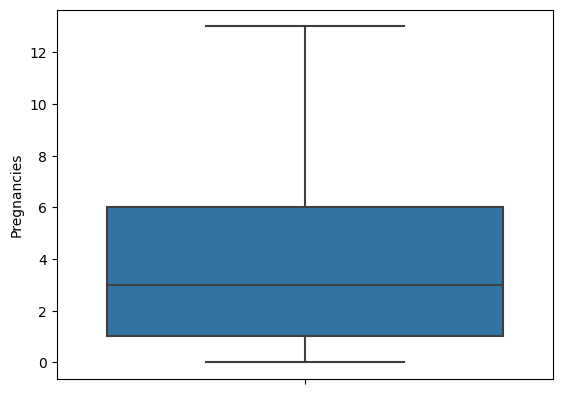

In [15]:

sns.boxplot(y='Pregnancies', data=Diabetes)

In [18]:
lowerLimit = Diabetes['Glucose'].quantile(0.10)
upperLimit = Diabetes['Glucose'].quantile(0.99)
lowerLimit

85.0

In [19]:
upperLimit

196.0

In [20]:
Diabetes['Glucose'] = Diabetes['Glucose'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Glucose'>

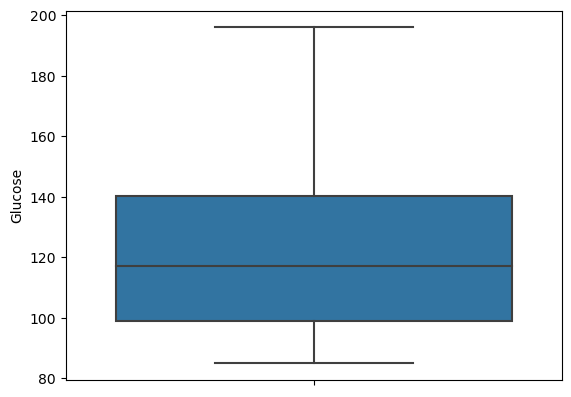

In [21]:
sns.boxplot(y='Glucose', data=Diabetes)

In [39]:
lowerLimit = Diabetes['BloodPressure'].quantile(0.08)
upperLimit = Diabetes['BloodPressure'].quantile(0.82)
lowerLimit

50.0

In [37]:
upperLimit

82.0

In [40]:
Diabetes['BloodPressure'] = Diabetes['BloodPressure'].clip(lowerLimit, upperLimit)

<Axes: ylabel='BloodPressure'>

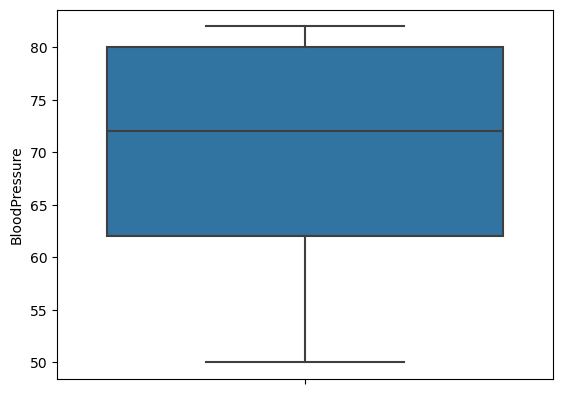

In [41]:
sns.boxplot(y='BloodPressure', data=Diabetes)

In [63]:
lowerLimit = Diabetes['Insulin'].quantile(0.00)
upperLimit = Diabetes['Insulin'].quantile(0.90)
lowerLimit

0.0

In [64]:
upperLimit

210.0

In [65]:
Diabetes['Insulin'] = Diabetes['Insulin'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Insulin'>

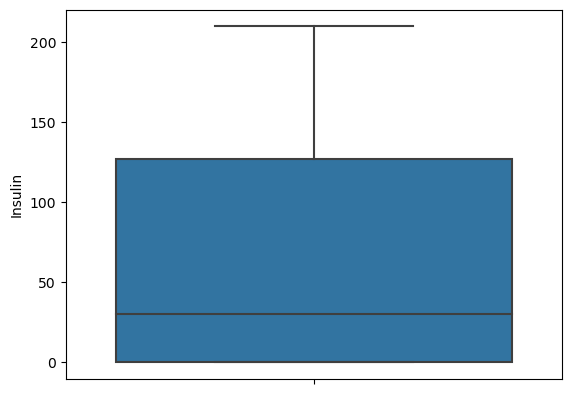

In [66]:
sns.boxplot(y='Insulin', data=Diabetes)

In [124]:
lowerLimit = Diabetes['BMI'].quantile(0.08)
upperLimit = Diabetes['BMI'].quantile(0.65)
lowerLimit

23.0

In [125]:
upperLimit

30.5

In [126]:
Diabetes['BMI'] = Diabetes['BMI'].clip(lowerLimit, upperLimit)

<Axes: ylabel='BMI'>

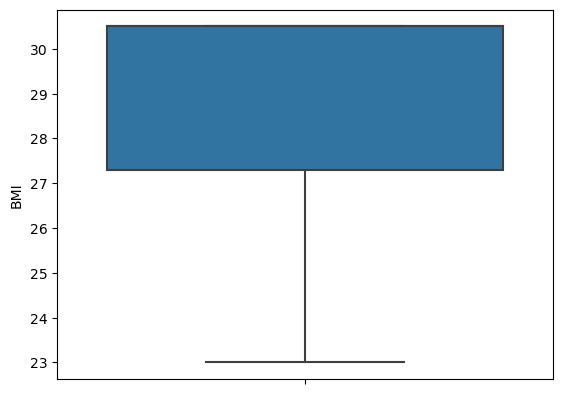

In [127]:
sns.boxplot(y='BMI', data=Diabetes)

In [133]:
lowerLimit = Diabetes['DiabetesPedigreeFunction'].quantile(0.00)
upperLimit = Diabetes['DiabetesPedigreeFunction'].quantile(0.90)
lowerLimit

0.078

In [134]:
upperLimit

0.8781800000000001

In [135]:
Diabetes['DiabetesPedigreeFunction'] = Diabetes['DiabetesPedigreeFunction'].clip(lowerLimit, upperLimit)

<Axes: ylabel='DiabetesPedigreeFunction'>

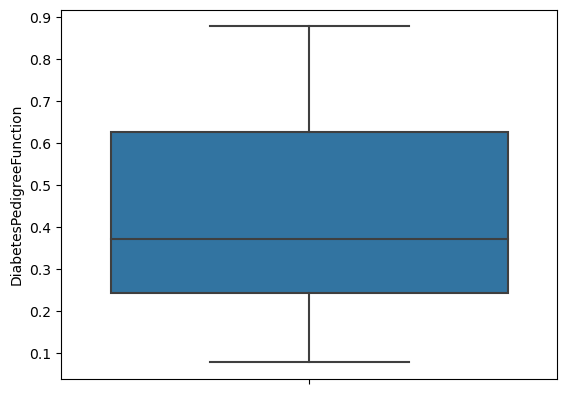

In [136]:
sns.boxplot(y='DiabetesPedigreeFunction', data=Diabetes)

In [138]:
lowerLimit = Diabetes['Age'].quantile(0.00)
upperLimit = Diabetes['Age'].quantile(0.90)
lowerLimit

21.0

In [140]:
upperLimit

51.0

In [141]:
Diabetes['Age'] = Diabetes['Age'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Age'>

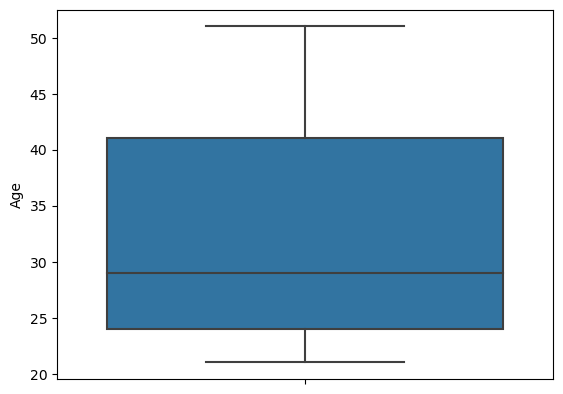

In [142]:
sns.boxplot(y='Age', data=Diabetes)

In [145]:
Diabetes2=pd.read_csv('diabetes.csv')

<Axes: ylabel='SkinThickness'>

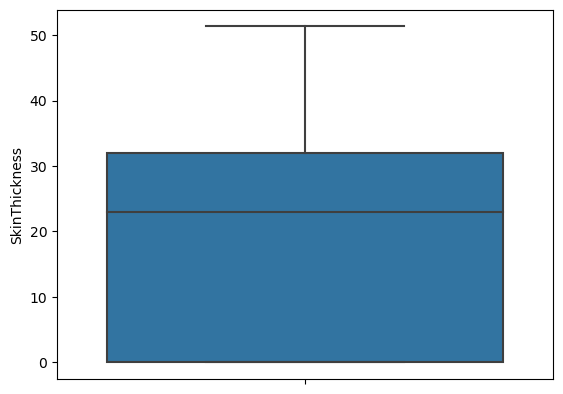

In [156]:
sns.boxplot(y='SkinThickness', data=Diabetes)

In [151]:
lowerLimit = Diabetes['SkinThickness'].quantile(0.00)
upperLimit = Diabetes['SkinThickness'].quantile(0.99)
lowerLimit

0.0

In [152]:
upperLimit

51.33000000000004

In [153]:
Diabetes['SkinThickness'] = Diabetes['SkinThickness'].clip(lowerLimit, upperLimit)

In [155]:
Diabetes['SkinThickness'] = Diabetes2['SkinThickness']

In [157]:
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [159]:
X=Diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [160]:
Y=Diabetes['Outcome']

In [161]:
#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
#create the object
model = DecisionTreeClassifier(criterion='entropy')

In [164]:
#We train our model with the dataset below

model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [165]:
#So after training, you can now predict outputs using the model.
Y_pred = model.predict(X_test)

In [166]:
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [167]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[82, 20],
       [17, 35]], dtype=int64)

In [168]:
accuracy_score(Y_test,Y_pred)

0.7597402597402597

In [170]:
#Then we can visualize the results using heatmap below
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[82, 20],
       [17, 35]], dtype=int64)

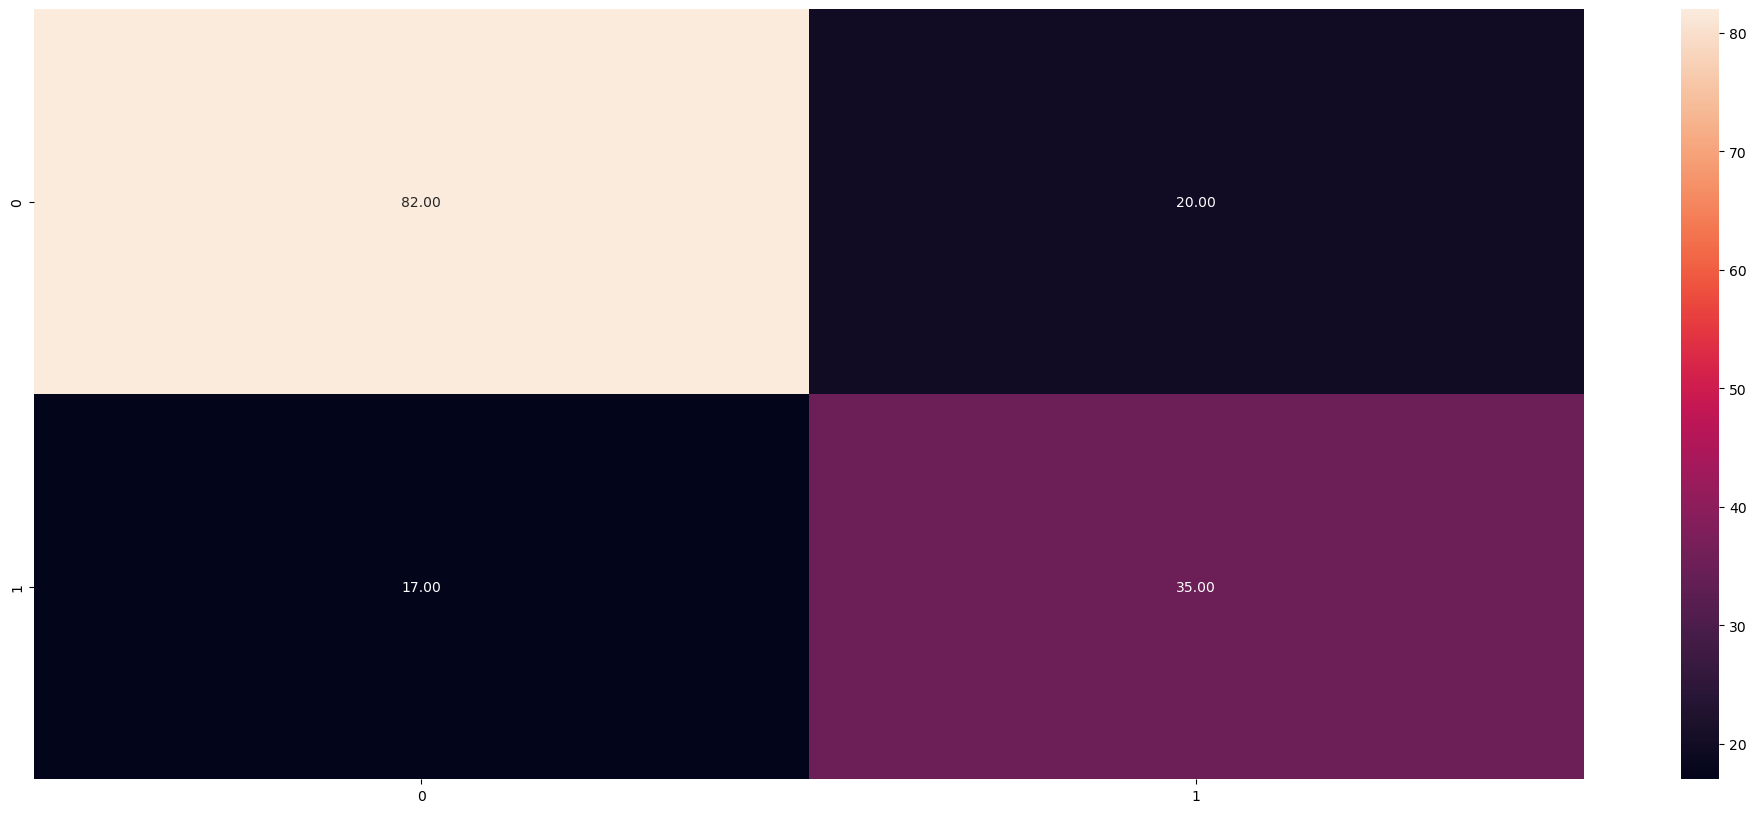

In [171]:
# Visualize the confusion matrix using Seabornsns.heatmap(cm, annot=True, fmt="d")
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.show()

In [178]:
#Prediction for the patient KUBO(K)
T = [5,166,72,19,175,22.7,0.6,51]
input = np.asarray(T)
input_reshaped = input.reshape(1,-1)

In [179]:
#So after training, you can now predict outputs using the model.
K_pred = model.predict(input_reshaped)

C:\Users\visit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [180]:
K_pred

array([0], dtype=int64)